# Import libraries

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Load and play audio files

In [2]:
filename = "../audio/carole-mod1.wav"


y, sr = librosa.load(filename) 

print(y.shape)
print(sr)

ipd.Audio(y, rate=sr) 



(215197,)
22050


# Spectrogram

[Text(0.5, 1.0, 'Spectrogram')]

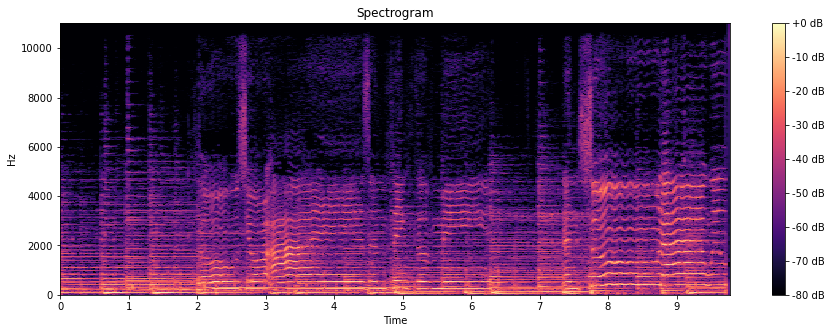

In [3]:
# spectrogram
D = np.abs(librosa.stft(y))
D_dB = librosa.amplitude_to_db(D, ref=np.max)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')

# Mel-Spectrogram

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'Mel-Spectrogram')]

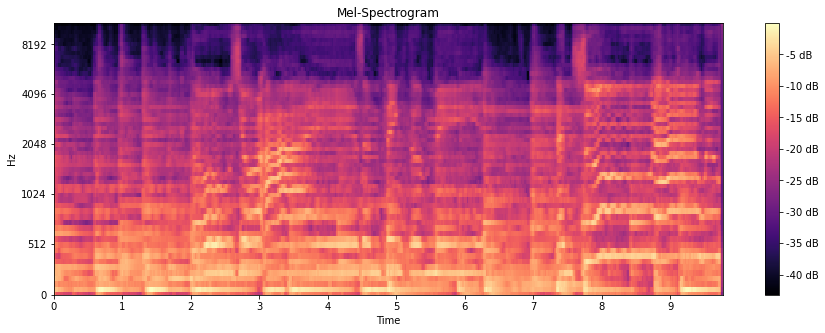

In [4]:
# Mel spectrogram
S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=60) # n_mels= 60
S_dB = librosa.power_to_db(S, ref=np.max)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Mel-Spectrogram')

In [19]:
print("Spectrogram Size: ", D.shape)
print("Mel-spectrogram Sizez: ", S.shape)

Spectrogram Size:  (1025, 421)
Mel-spectrogram Sizez:  (60, 421)


# Mel-Frequency Cepstral Coefficient (MFCC)

[Text(0.5, 1.0, 'MFCC')]

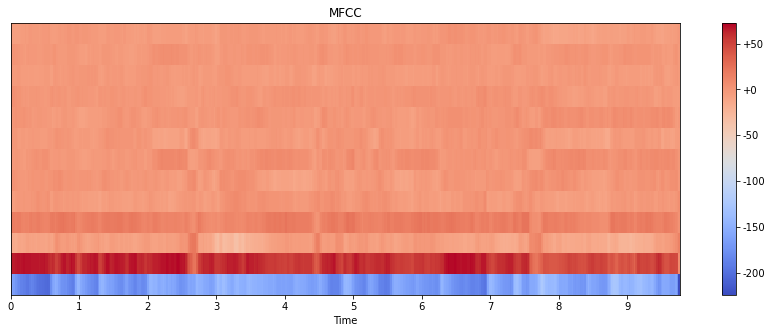

In [5]:
mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=13)  
#mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f")
ax.set(title='MFCC')

# Reconstructed Spectrogram from MFCC

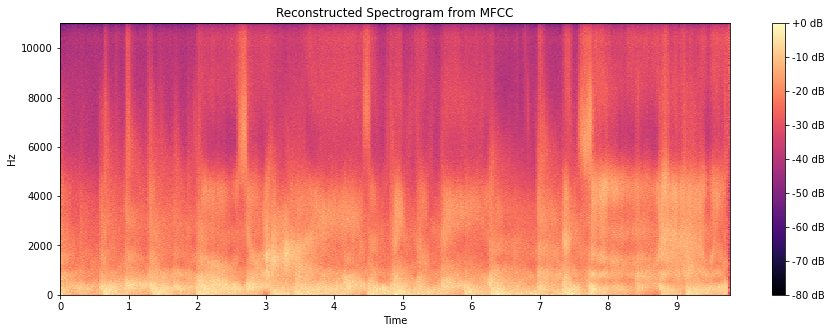

In [6]:
y_mfcc = librosa.feature.inverse.mfcc_to_audio(mfcc, n_mels = 60)
D_mfcc = np.abs(librosa.stft(y_mfcc))
D_mfcc_dB = librosa.amplitude_to_db(D_mfcc, ref=np.max)


# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(D_mfcc_dB, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Reconstructed Spectrogram from MFCC')


ipd.Audio(y_mfcc, rate=sr) 



# Display all together 

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


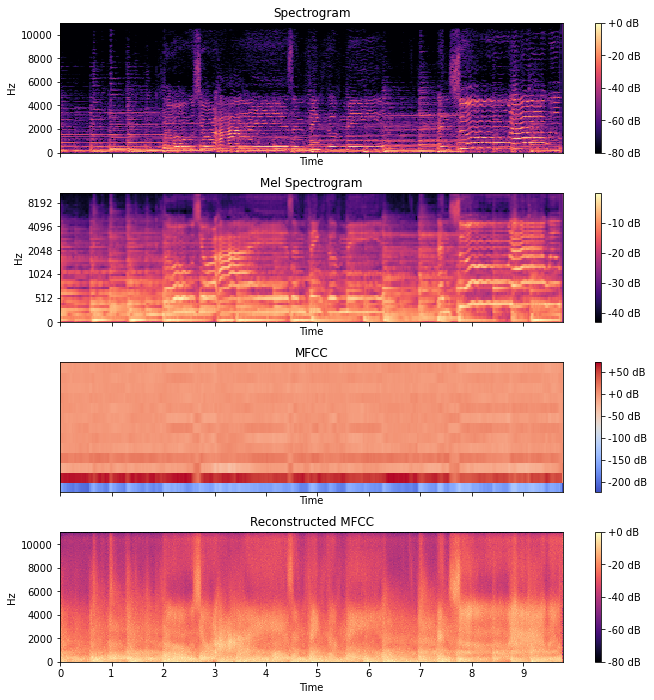

In [20]:

# display spectrogram
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(10,10))
fig.tight_layout(pad=3.0)

img = librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax[0])
fig.colorbar(img, ax=ax[0], format="%+2.f dB")
ax[0].set(title='Spectrogram')
ax[0].label_outer()

img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax[1])
fig.colorbar(img, ax=ax[1], format="%+2.f dB")
ax[1].set(title='Mel Spectrogram')
ax[1].label_outer()

img = librosa.display.specshow(mfcc, x_axis='time', ax=ax[2])
fig.colorbar(img, ax=ax[2], format="%+2.f dB")
ax[2].set(title='MFCC')
ax[2].label_outer()


img = librosa.display.specshow(D_mfcc_dB, x_axis='time', y_axis='linear', ax=ax[3])
fig.colorbar(img, ax=ax[3], format="%+2.f dB")
ax[3].set(title='Reconstructed MFCC')
ax[3].label_outer()


# Spectral Statistics: Centroid

[Text(0.5, 1.0, 'Spectral Centroid')]

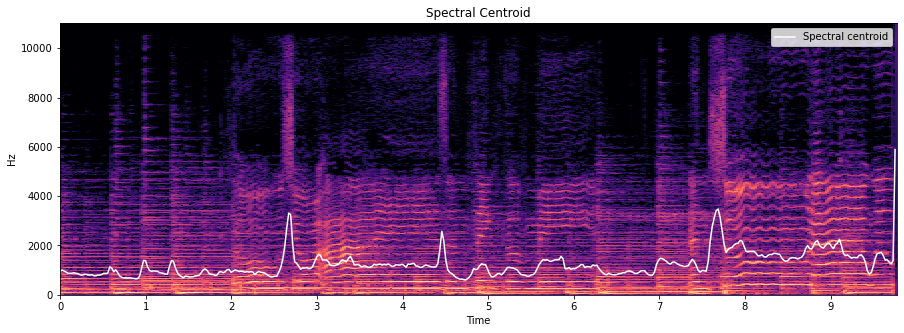

In [8]:
spec_centroid = librosa.feature.spectral_centroid(S=D)

times = librosa.times_like(spec_centroid)
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax)
ax.plot(times, spec_centroid.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='Spectral Centroid')



# Chroma

In [9]:
filename = "../audio/piano_88keys_short_vel96_part2.wav"

y2, sr = librosa.load(filename)   
print(y2.shape)
print (sr)

ipd.Audio(y2, rate=sr) 


(1278900,)
22050


[Text(0.5, 1.0, 'Spectrogram')]

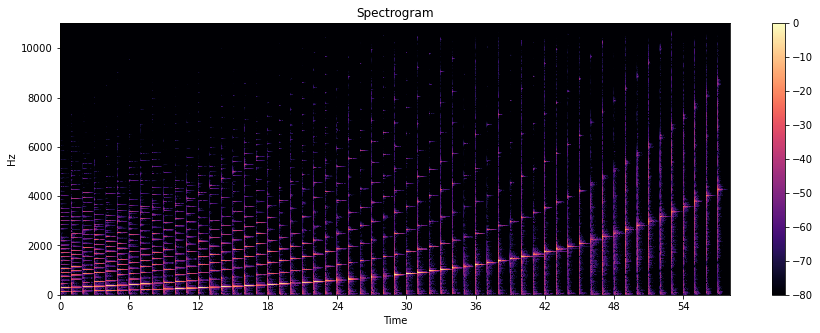

In [12]:
Y2 = librosa.stft(y2)
D2 = librosa.amplitude_to_db(np.abs(Y2), ref=np.max)

fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Spectrogram')

[Text(0.5, 1.0, 'Chromagram')]

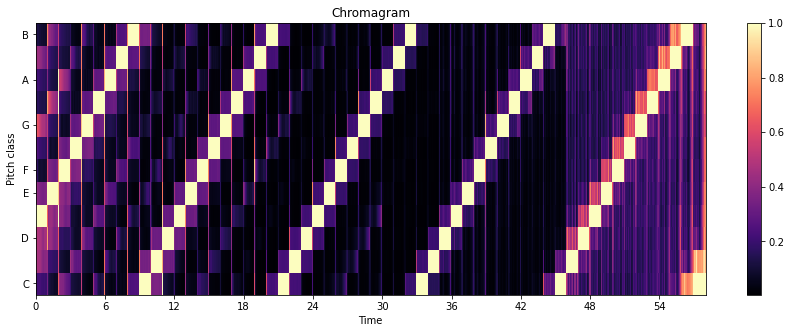

In [13]:
chroma2 = librosa.feature.chroma_stft(S=np.abs(Y2), sr=sr)

fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(chroma2, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')